In [21]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from visualizations import scatter_metrics_vs_performance

In [22]:
df = pd.read_csv("../trajectories/metrics.csv")

In [40]:
df['att_dim/effective_rank']

0                                             [1.1115135]
2                                              [1.107698]
4                                             [1.1488526]
6                                             [1.1165043]
8                                             [1.1104256]
                              ...                        
7304    [1.5036196, 1.5005126, 1.49735, 1.4955016, 1.5...
7306                                          [15.519819]
7308    [1.9787211, 1.9804019, 1.9700813, 1.9791242, 1...
7310                               [13.272071, 13.303872]
7312                                           [1.400471]
Name: att_dim/effective_rank, Length: 3657, dtype: object

In [ ]:
sns.heatmap(df,)

ValueError: could not convert string to float: '[1.7393526455337258]'

In [24]:
df = df[df['train_nrmse']!='train_nrmse']

In [33]:
df_grouped = df.groupby(by=['n_modules', 'n_hid', 'connection_matrix', 'dataset', 'att_dim/correlation_dimension_mean', 'att_dim/participation_ratio_mean', 'att_dim/effective_rank_mean'])[['val_nrmse']].max().reset_index()



In [34]:
df_grouped_lorenz = df_grouped[df_grouped['dataset']=='lorenz']
df_grouped_mg = df_grouped[df_grouped['dataset']=='mg17']


In [27]:
df_grouped_lorenz_128 = df_grouped_lorenz[df_grouped_lorenz['n_hid'].astype(int) == 128]
df_grouped_mg_128 = df_grouped_mg[df_grouped_mg['n_hid'].astype(int) == 128]

In [35]:
df_grouped_mg_128['n_hid'] = df_grouped_mg_128['n_hid'].astype(int)
df_grouped_mg_128['n_modules'] = df_grouped_mg_128['n_modules'].astype(int)

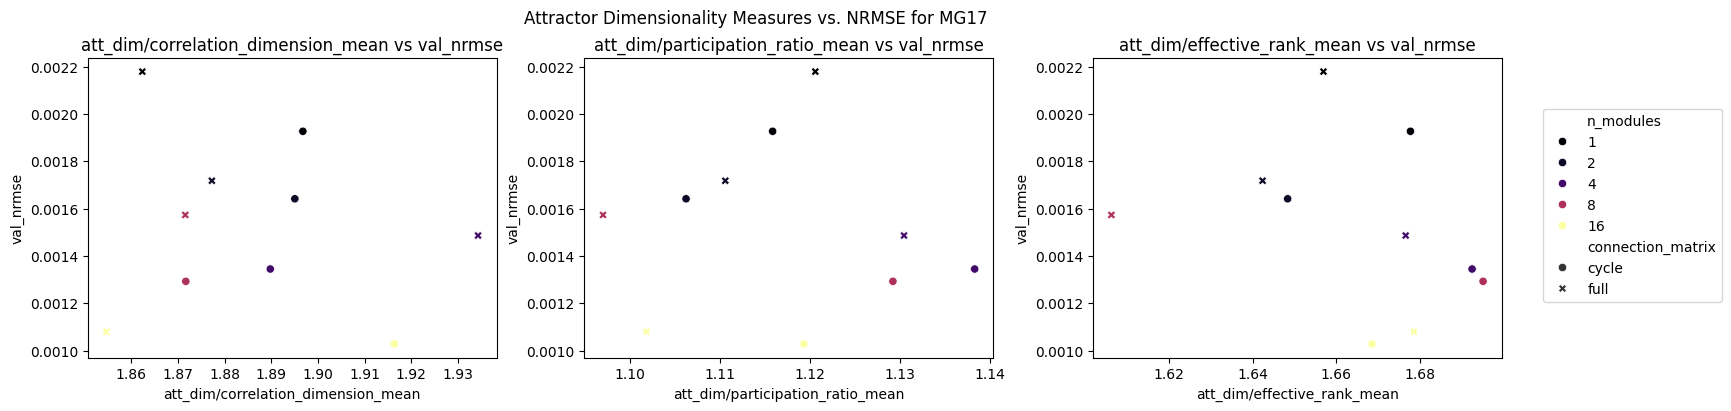

In [36]:
scatter_metrics_vs_performance(df_grouped_mg_128, ['att_dim/correlation_dimension_mean',	'att_dim/participation_ratio_mean',	'att_dim/effective_rank_mean'], 'val_nrmse', 'Attractor Dimensionality Measures vs. NRMSE for MG17', semilogy=False)

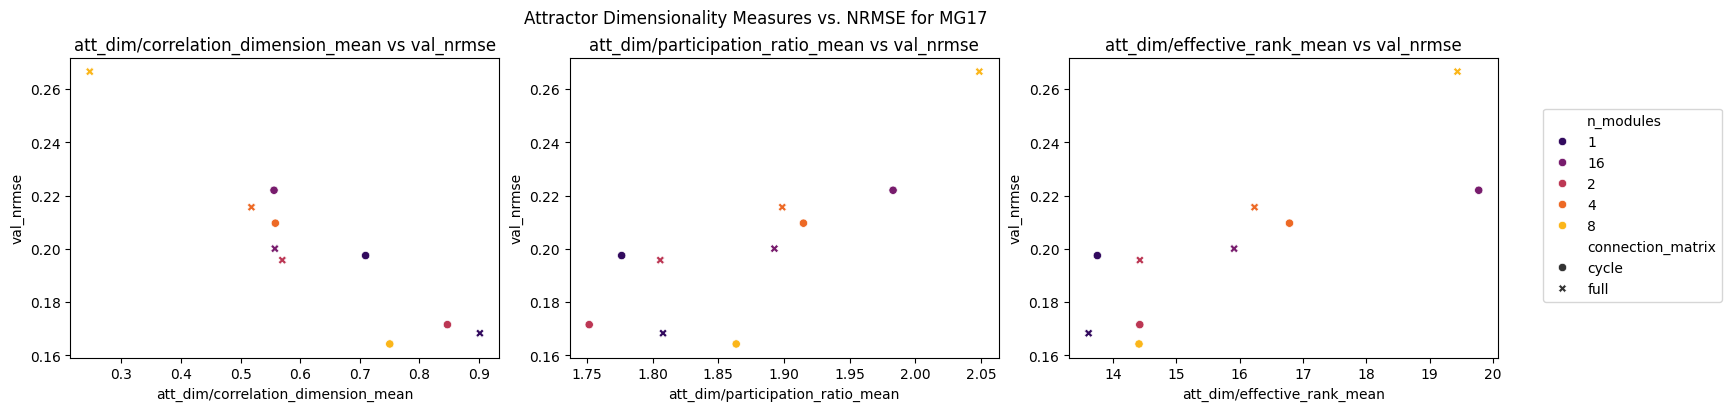

In [37]:
scatter_metrics_vs_performance(df_grouped_lorenz_128, ['att_dim/correlation_dimension_mean',	'att_dim/participation_ratio_mean',	'att_dim/effective_rank_mean'], 'val_nrmse', 'Attractor Dimensionality Measures vs. NRMSE for MG17', semilogy=False)